In [1]:
import as_seg.autosimilarity_computation as as_comp
import as_seg.barwise_input as bi
import as_seg.scripts.overall_scripts as scr
from as_seg.model.current_plot import *
import as_seg.model.features as features

import librosa
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Chapter 2 (SOTA Music Processing etc)

In [ ]:
# La v finale du signal utilise librosa en v bizarre, et est dans tatoo a cause de conflits de versions

In [ ]:
n_fft = 2048
sr = 44100
n_mels=12
fmin=0.0
fmax=sr/2
mel_basis = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mels, fmin=fmin, fmax=fmax, norm=None)
mel_basis /= np.max(mel_basis, axis=-1)[:, None]

f = np.linspace(fmin, fmax, int(n_fft/2)+1)
#f_all = np.matlib.repmat(f, n,1)
#plt.plot(f,mel_basis)
fig, ax = plt.subplots(figsize=(8,3))
ax.plot(f, mel_basis.T, color = "black")
ax.set_ylim(0.01)
ax.set_xlabel("Frequencies (Hz)", fontsize = 16)
ax.set_ylabel("Amplitude", fontsize = 16)
#fig.show()

#fig.savefig("mel_filter_banks.pdf", bbox_inches='tight')

In [ ]:
#plt.rcParams.update({'font.size': 15})

fig, ax = plt.subplots(1, 1, figsize=(8,5))
ax.plot(np.linspace(0, int(standard_sr/2), stft.shape[0]),np.mean(stft, axis = 1))
ax.set_yscale('log')
ax.set_ylabel("Valules\n(logarithmically scaled)", fontsize = 14)
ax.set_xlabel("Frequency (Hz)", fontsize = 14)

fig.savefig("decrease_stft_values.pdf", bbox_inches='tight')
#fig.savefig('decrease_stft_values.png', bbox_inches='tight',dpi=400, transparent=True)

In [ ]:
x_range = np.linspace(0, clip_3_5.shape[0]/sampling_rate, int(clip_3_5.shape[0]/512) + 2)


#signal_resampled = librosa.resample(clip_3_5, sampling_rate, standard_sr)
#stft = features.get_spectrogram(signal = signal_resampled, sr = standard_sr, feature = "mfcc", n_mfcc = 32, hop_length = hop_length, n_fft = n_fft)

#stft = features.get_spectrogram(signal = clip_3_5, sr = sampling_rate, feature = "stft", n_mfcc = 32, hop_length = hop_length, n_fft = n_fft)
stft = np.abs(librosa.core.stft(np.asfortranarray(clip_3_5), n_fft=n_fft, hop_length = hop_length))
y_range = np.linspace(0, int(standard_sr/2), stft.shape[0] + 1)
#plot_me_this_spectrogram_new(stft, title = "Magnitude spectrogram", y_axis = "Frequency (Hz)", x_range = x_range, y_range = y_range)
#plot_me_this_spectrogram_new(np.log(stft), title = "Logarithm of the magnitude spectrogram", y_axis = "Frequency (Hz)", x_range = x_range, y_range = y_range)

#librosa.display.specshow(stft[:470, ::2], hop_length = hop_length, sr = 44100, x_axis = 's', y_axis = 'hz')

fig, ax = plt.subplots()

padded_logstft = pad_factor(np.log(stft))
ax.pcolormesh(x_range, y_range, padded_logstft, cmap=cm.Greys, norm = None, vmin = None, vmax = None)
ax.set_xlabel("Time (s)", fontsize=14)
ax.set_ylabel("Frequency (Hz)", fontsize=14)
plt.show()

#fig.savefig("log_stft_example.pdf", bbox_inches='tight')
fig.savefig('log_stft_example.png', bbox_inches='tight',dpi=400, transparent=True)

In [ ]:
def save_spectrogram(spec, title_file, x_range, y_range, ylabel, pdf = False):
    fig, ax = plt.subplots()

    padded_spec = pad_factor(spec)
    ax.pcolormesh(x_range, y_range, padded_spec, cmap=cm.Greys, norm = None, vmin = None, vmax = None)
    ax.set_xlabel("Time (s)", fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    plt.show()

    if pdf:
        fig.savefig(f"{title_file}.pdf", bbox_inches='tight')
    else:
        fig.savefig(f"{title_file}.png", bbox_inches='tight',dpi=400, transparent=True)

def plot_spectrogram(spec, title_file, x_range, y_range, ylabel, cmap = cm.Greys):
    fig, ax = plt.subplots()

    padded_spec = pad_factor(spec)
    ax.pcolormesh(x_range, y_range, padded_spec, cmap=cmap, norm = None, vmin = None, vmax = None)
    ax.set_xlabel("Time (s)", fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    plt.show()

mel = features.get_spectrogram(signal = clip_3_5, sr = sampling_rate, feature = "mel_grill", n_mfcc = 32, hop_length = hop_length, n_fft = n_fft)
#plot_me_this_spectrogram_new(mel, title = "Mel spectrogram", y_axis = "Mel coefficients", x_range = x_range, y_range = None)
#save_spectrogram(mel, title_file = "mel_example", x_range = x_range, y_range = range(0,81), ylabel = "Mel coefficients", pdf = False)

log_mel = features.get_spectrogram(signal = clip_3_5, sr = sampling_rate, feature = "log_mel_grill", n_mfcc = 32, hop_length = hop_length, n_fft = n_fft)
#plot_me_this_spectrogram_new(log_mel, title = "Log Mel spectrogram", y_axis = "Mel coefficients", x_range = x_range, y_range = None)
#save_spectrogram(log_mel, title_file = "log_mel_example", x_range = x_range, y_range = range(0,81), ylabel = "Mel coefficients", pdf = False)
plot_spectrogram(log_mel, title_file = "log_mel_example", x_range = x_range, y_range = range(0,81), ylabel = "Mel coefficients", cmap = cm.inferno)

nn_log_mel = features.get_spectrogram(signal = clip_3_5, sr = sampling_rate, feature = "nn_log_mel_grill", n_mfcc = 32, hop_length = hop_length, n_fft = n_fft)
#plot_me_this_spectrogram_new(nn_log_mel, title = "NNLM spectrogram", y_axis = "Mel coefficients", x_range = x_range, y_range = None)
plot_spectrogram(nn_log_mel, title_file = "nn_log_mel_example", x_range = x_range, y_range = range(0,81), ylabel = "Mel coefficients", cmap = cm.inferno)


In [ ]:
mfcc = features.get_spectrogram(signal = clip_3_5, sr = sampling_rate, feature = "mfcc", n_mfcc = 10, hop_length = hop_length, n_fft = n_fft)
#plot_me_this_spectrogram_new(mfcc, title = "MFCC spectrogram", y_axis = "MFCC coefficients", x_range = x_range, y_range = None)
#save_spectrogram(mfcc, title_file = "mfcc_example", x_range = x_range, y_range = range(0,11), ylabel = "MFCC coefficients", pdf = False)

fig, ax = plt.subplots()

padded_mfcc = pad_factor(mfcc)
ax.pcolormesh(x_range, range(0,11), padded_mfcc, cmap=cm.Greys, norm = None, vmin = None, vmax = None)
ax.set_xlabel("Time (s)", fontsize=14)
ax.set_ylabel("MFCC coefficients", fontsize=14)
ax.set_yticks([1,5,10])
ax.set_yticks([0.5,4.5,9.5])
ax.set_yticklabels(['1','5','10'])
plt.show()

#fig.savefig("log_stft_example.pdf", bbox_inches='tight')
fig.savefig('mfcc_example.png', bbox_inches='tight',dpi=400, transparent=True)

In [ ]:
chromagram = features.get_spectrogram(signal = clip_3_5, sr = sampling_rate, feature = "pcp", n_mfcc = 10, hop_length = hop_length, n_fft = n_fft)
fig, ax = plt.subplots()

padded_chroma = pad_factor(chromagram)
ax.pcolormesh(x_range, range(0,13), padded_chroma, cmap=cm.Greys, norm = None, vmin = None, vmax = None)
ax.set_xlabel("Time (s)", fontsize=14)
ax.set_ylabel("Pitch classes", fontsize=14)
ax.set_yticks([0.5,2.5,4.4,5.6,7.5,9.5,11.5])
ax.set_yticklabels(['C','D','E','F','G','A','B'])
plt.show()

fig.savefig("chroma_example.pdf", bbox_inches='tight')
#fig.savefig('chroma_example.png', bbox_inches='tight',dpi=400, transparent=True)

In [ ]:
import as_seg.scripts.default_path as paths
import as_seg.scripts.overall_scripts as scr
import as_seg.data_manipulation as dm
from as_seg.model.current_plot import *
import mirdata
import os
plt.rcParams.update({'font.size': 12})

print("RWC POP MIREX10")
annotations_folder = "{}/MIREX10".format(paths.path_annotation_rwc)
paths_dataset = scr.load_RWC_dataset(paths.path_entire_rwc, "MIREX10")
lengths = []

song_idx = 0

for song_and_annotations in paths_dataset:
    song_number = song_and_annotations[0]
    annot_path = "{}/{}".format(annotations_folder, song_and_annotations[1])
    annotations = dm.get_segmentation_from_txt(annot_path, "MIREX10")
    bars = scr.load_or_save_bars(paths.path_data_persisted_rwc, "{}/{}.wav".format(paths.path_entire_rwc, song_number))
    barwise_annot = dm.frontiers_from_time_to_bar(np.array(annotations)[:,1], bars)
    for i in range(len(barwise_annot) - 1):
        lengths.append(barwise_annot[i+1] - barwise_annot[i])
        
plot_lenghts_hist(lengths)

print("SALAMI UPPER TEST SET")

salami = mirdata.initialize('salami', data_home = paths.path_entire_salami)
len_salami = len(salami.track_ids)

lengths = []

all_tracks = salami.load_tracks()

song_idx = 0

file_test_set_gs = open(f"{os.getcwd()}/test_set_salami_gs.txt")

test_dataset = []
for part in file_test_set_gs.readlines():
    line_broken = part.split("\n")
    test_dataset.append(int(line_broken[0]))

for key, track in all_tracks.items():
    if int(key) in test_dataset:
        try:
            bars = scr.load_or_save_bars(paths.path_data_persisted_salami, track.audio_path)
            ref_tab = []
            try:
                references_segments = salami.load_sections(track.sections_annotator1_uppercase_path).intervals
                ref_tab.append(references_segments)
            except (TypeError, AttributeError):
                pass

            try:
                references_segments = salami.load_sections(track.sections_annotator2_uppercase_path).intervals
                ref_tab.append(references_segments)
            except (TypeError, AttributeError):
                pass
            for annotations in ref_tab:
                barwise_annot = dm.frontiers_from_time_to_bar(np.array(annotations)[:,1], bars)
                for i in range(len(barwise_annot) - 1):
                    lengths.append(barwise_annot[i+1] - barwise_annot[i])

        except FileNotFoundError:
            print(f"{key} not found, normal ?")

plot_lenghts_hist(lengths)


# Chapter 3 (CBM)

<Figure size 432x288 with 0 Axes>

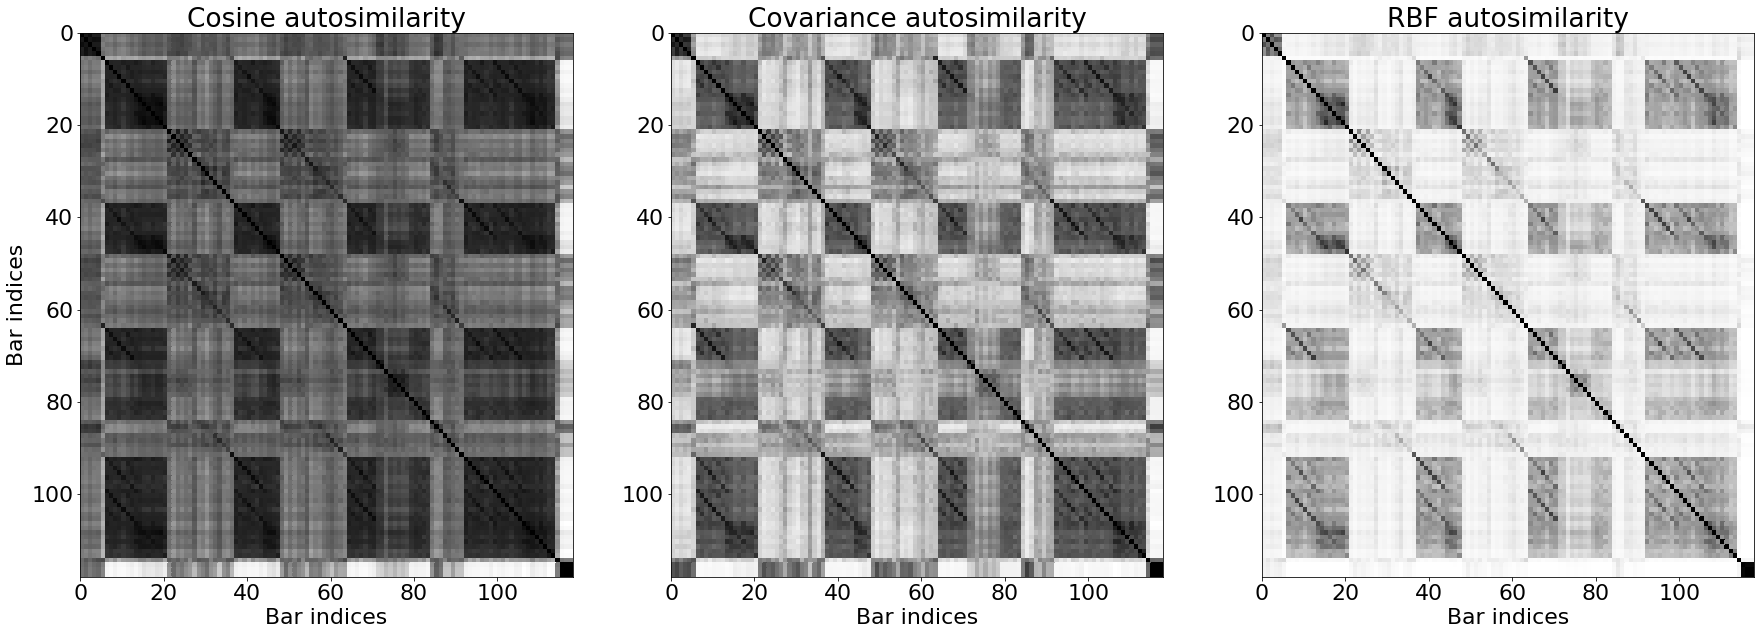

In [3]:
plt.rcParams.update({'font.size': 22})
plt.set_cmap(cm.Greys)

feature = "log_mel_grill"
subdivision = 96
hop_length = 32
hop_length_seconds = hop_length/44100
song_name = 1
spectrogram, bars, references_segments = scr.load_spec_annot_song_RWC(song_name, feature, hop_length)

barwise_TF_matrix = bi.barwise_TF_matrix(spectrogram, bars, hop_length_seconds, subdivision)

fig, axs = plt.subplots(1, 3, figsize=(30,10))
autosimil_1 = as_comp.switch_autosimilarity(barwise_TF_matrix, similarity_type = "cosine", normalise = True)
padded_spec_1 = pad_factor(autosimil_1)
axs[0].pcolormesh(np.arange(padded_spec_1.shape[0]), np.arange(padded_spec_1.shape[0]), padded_spec_1)
axs[0].set_title('Cosine autosimilarity')
axs[0].invert_yaxis()
axs[0].set_xlabel("Bar indices")
axs[0].set_ylabel("Bar indices")

autosimil_2 = as_comp.switch_autosimilarity(barwise_TF_matrix, similarity_type = "covariance", normalise = True)
padded_spec_2 = pad_factor(autosimil_2)
axs[1].pcolormesh(np.arange(padded_spec_2.shape[0]), np.arange(padded_spec_2.shape[0]), padded_spec_2)
axs[1].set_title('Covariance autosimilarity')
axs[1].invert_yaxis()
axs[1].set_xlabel("Bar indices")

autosimil_3 = as_comp.switch_autosimilarity(barwise_TF_matrix, similarity_type = "RBF", normalise = True)
padded_spec_3 = pad_factor(autosimil_3)
axs[2].pcolormesh(np.arange(padded_spec_3.shape[0]), np.arange(padded_spec_3.shape[0]), padded_spec_3)
axs[2].set_title('RBF autosimilarity')
axs[2].invert_yaxis()
axs[2].set_xlabel("Bar indices")
fig.savefig(f"autosimilarities.pdf", bbox_inches = "tight")#, format='png')

plt.show()

Text(0, 0.5, 'Bar indices')

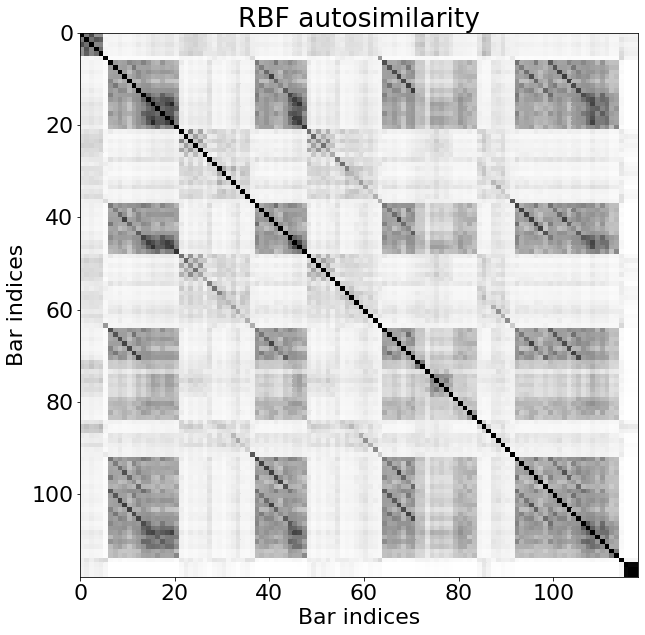

In [4]:
fig, axs = plt.subplots(1, 1, figsize=(10,10))

autosimil_3 = as_comp.switch_autosimilarity(barwise_TF_matrix, similarity_type = "RBF", normalise = True)
padded_spec_3 = pad_factor(autosimil_3)
axs.pcolormesh(np.arange(padded_spec_3.shape[0]), np.arange(padded_spec_3.shape[0]), padded_spec_3)
axs.set_title('RBF autosimilarity')
axs.invert_yaxis()
axs.set_xlabel("Bar indices")
axs.set_ylabel("Bar indices")

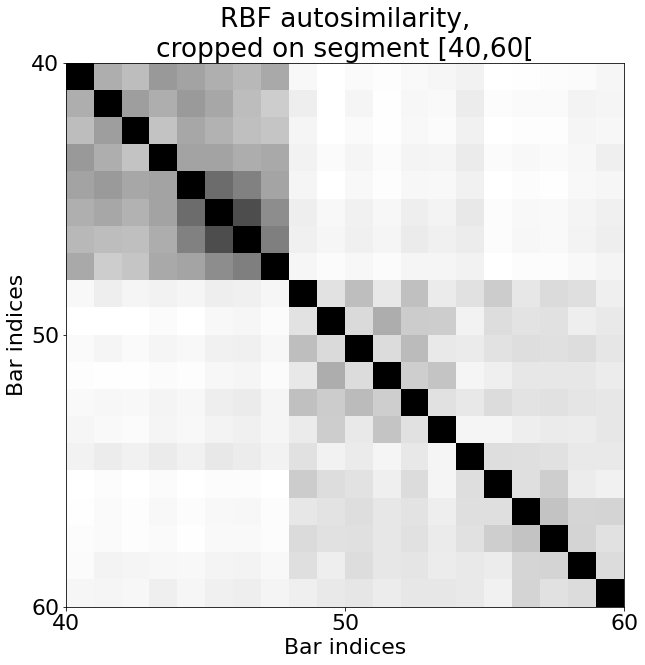

In [5]:
fig, axs = plt.subplots(1, 1, figsize=(10,10))

autosimil_3 = as_comp.switch_autosimilarity(barwise_TF_matrix, similarity_type = "RBF", normalise = True)
autosimil_3 = autosimil_3[40:60, 40:60]
padded_spec_3 = pad_factor(autosimil_3)
axs.pcolormesh(np.arange(padded_spec_3.shape[0]), np.arange(padded_spec_3.shape[0]), padded_spec_3)
axs.set_title('RBF autosimilarity,\ncropped on segment [40,60[')
axs.invert_yaxis()
axs.set_xlabel("Bar indices")
axs.set_ylabel("Bar indices")
axs.set_xticks([0,10,20])
axs.set_xticklabels([40,50,60])
axs.set_yticks([0,10,20])
axs.set_yticklabels([40,50,60])
plt.rcParams.update({'font.size': 40})
